Text(0.5, 1.0, 'retangular window without zero-padding')

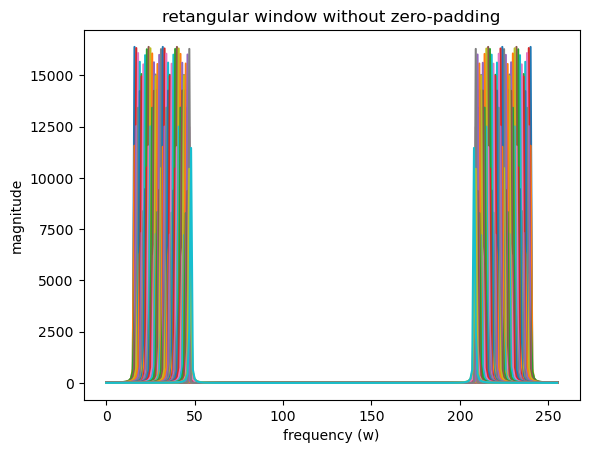

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
#%matplotlib inline      # Uncomment this to show figure in Jupyter Notebook

N = 256;                 # length of test signals
num_freqs = 100;         # number of frequencies to test

# Generate vector of frequencies to test
omega = np.pi/8 + np.linspace(0,num_freqs-1,num_freqs)/num_freqs*np.pi/4;

S = np.zeros([N,num_freqs]);                        # matrix to hold FFT results

for i in range(0,len(omega)):                       # loop through freq. vector
    s = np.sin(omega[i]*np.linspace(0,N-1,N));      # generate test sine wave
    win = signal.boxcar(N);                         # use rectangular window
    s = s*win;                                      # multiply input by window
    S[:,i] = np.square(np.abs(np.fft.fft(s)));      # generate magnitude of FFT
                                                    # and store as a column of S

plt.plot(S);
plt.xlabel('frequency (w)')
plt.ylabel('magnitude')
plt.title ('retangular window without zero-padding')

Text(0.5, 1.0, 'hamming window without zero-padding')

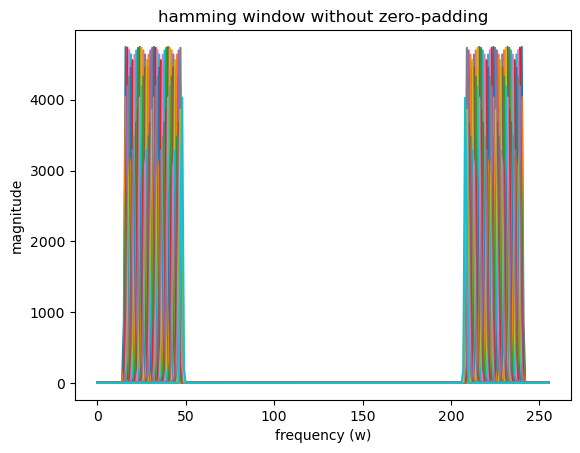

In [13]:
S = np.zeros([N,num_freqs]);                        # matrix to hold FFT results

for i in range(0,len(omega)):                       # loop through freq. vector
    s = np.sin(omega[i]*np.linspace(0,N-1,N));      # generate test sine wave
    win = signal.windows.hamming(N);                         # use rectangular window
    s = s*win;                                      # multiply input by window
    S[:,i] = np.square(np.abs(np.fft.fft(s)));      # generate magnitude of FFT
                                                    # and store as a column of S

plt.plot(S);
plt.xlabel('frequency (w)')
plt.ylabel('magnitude')
plt.title ('hamming window without zero-padding')

Text(0.5, 1.0, 'retangular window with zero-padding')

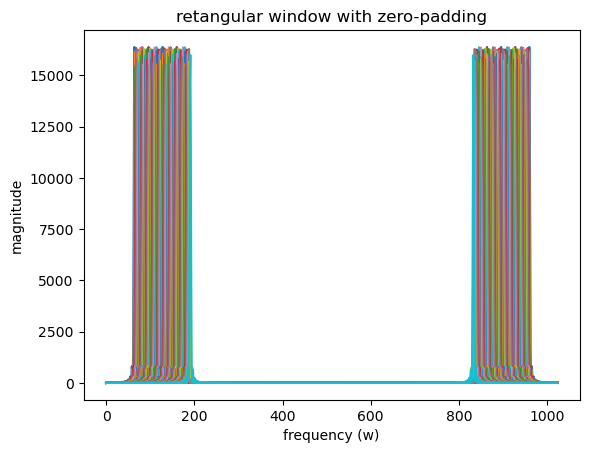

In [7]:
S = np.zeros([1024,num_freqs]);                        # matrix to hold FFT results

for i in range(0,len(omega)):                       # loop through freq. vector
    s = np.sin(omega[i]*np.linspace(0,N-1,N));      # generate test sine wave
    win = signal.boxcar(N);                         # use rectangular window
    s = s*win;                                      # multiply input by window
    for j in range (0,1024-256):
        s = np.append(s,0);
    S[:,i] = np.square(np.abs(np.fft.fft(s)));      # generate magnitude of FFT
                                                    # and store as a column of S

plt.plot(S);
plt.xlabel('frequency (w)')
plt.ylabel('magnitude')
plt.title ('retangular window with zero-padding')

Text(0.5, 1.0, 'hamming window with zero-padding')

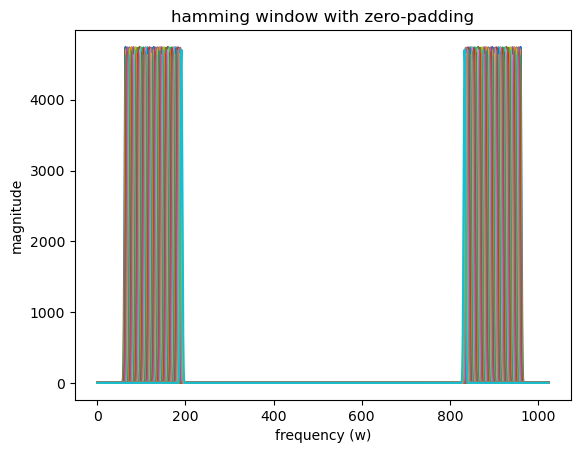

In [9]:
S = np.zeros([1024,num_freqs]);                        # matrix to hold FFT results

for i in range(0,len(omega)):                       # loop through freq. vector
    s = np.sin(omega[i]*np.linspace(0,N-1,N));      # generate test sine wave
    win = signal.windows.hamming(N);                         # use rectangular window
    s = s*win;                                      # multiply input by window
    for j in range (0,1024-256):
        s = np.append(s,0);
    S[:,i] = np.square(np.abs(np.fft.fft(s)));      # generate magnitude of FFT
                                                    # and store as a column of S

plt.plot(S);
plt.xlabel('frequency (w)')
plt.ylabel('magnitude')
plt.title ('hamming window with zero-padding')

In [36]:
#Question 1:
#hamming has wider main lobe, but side lobe attenuation is good,
#Boxcar(rectangular) has a narrower main loab but side lobe attenuation is bad.
#while zero pad doesn't increase DTFT resolution, zero pad while increase DFT resolution,
#since for computing, DFT is used, thus zero pad will increase resolution.
#we are not getting the increase in resolution for free since we are trading computational resrouces
#x[n] is the signal in time domain (discrete), X(w) is the signal for DTFT with continious freq.
#converting between x[n] and X(w) will have no loss.
#X[k] of DFT is sampled X(w), with discrete freq. This is finite thus could be use in computer
#but converting between x[n] and X[k] will have losses.

In [18]:
from IPython.display import Audio

fs = 8000        # Sampling Rate is 8000
duration = 1     # 1 sec
t = np.linspace(0,duration,duration*fs)
freq1 = 2000       # Tune Frequency is 600Hz
freq2 = 2100
tune = np.sin(2*np.pi*freq1*t)+np.sin(2*np.pi*freq2*t)

# To listen to it, you can use:
Audio(tune,rate=fs)

Text(0.5, 1.0, 'FFT of compound singal')

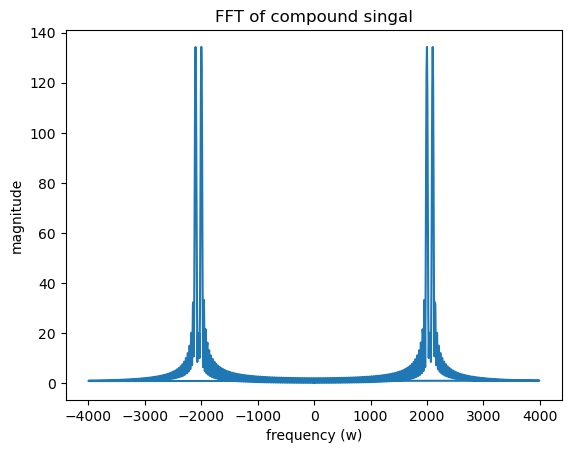

In [34]:
N = 256
win = signal.boxcar(N)
data = []
for i in range (0,N):
    data.append(win[i]*tune[i])
for j in range (0,1024-256):
    data.append(0)
w =np.fft.fft(data)
w_freq = np.fft.fftfreq(len(w),1/fs)

plt.plot(w_freq,abs(w))
plt.xlabel('frequency (w)')
plt.ylabel('magnitude')
plt.title('FFT of compound singal')


In [35]:
#Question 2
# we could probably resolve 2050Hz from 2000Hz by -3dB cutoff. 
# rectangular window with zero padding would probably be best at resolving close together frequencies
# since here the most critical thing would be minimizing main lobe width to reduce aliasing.

In [21]:
import numpy as np
from IPython.display import Audio
from scipy import signal

t = np.linspace(0,0.5,4001)
s = signal.chirp(t,1000,0.5,5000);    # Frequency-sweep that goes from 1000 Hz to 5000 Hz in 0.5 seconds

Audio(s,rate=8192)    # Default rate is 8192Hz

Text(0.5, 1.0, 'Part 2 with 50% overlap')

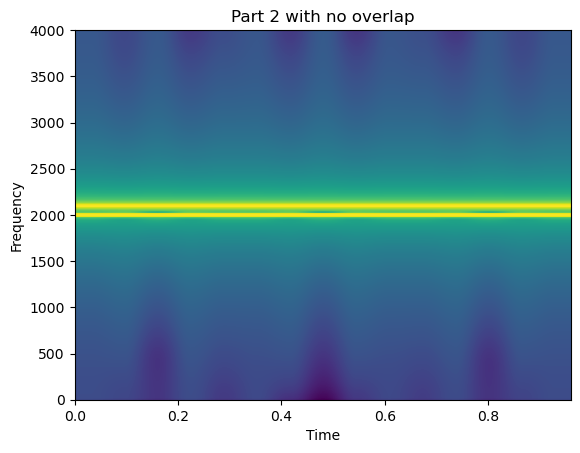

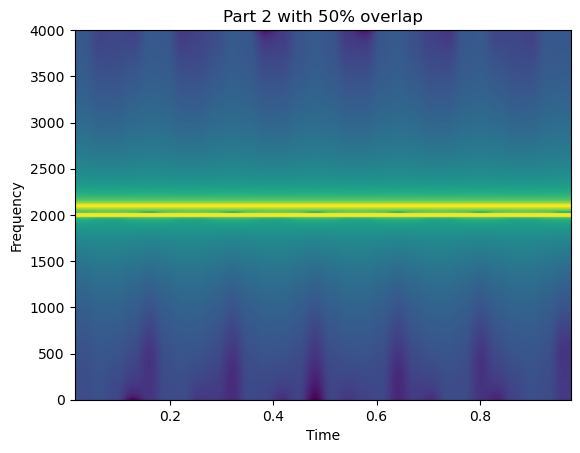

In [30]:
plt.specgram(tune,NFFT=N*2,noverlap=0,Fs=fs)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Part 2 with no overlap')
plt.figure()
plt.specgram(tune,NFFT=N*2,noverlap=N,Fs=fs)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Part 2 with 50% overlap')

<Figure size 640x480 with 0 Axes>

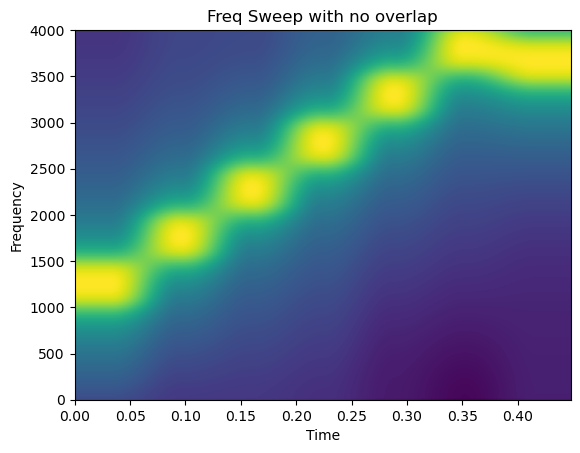

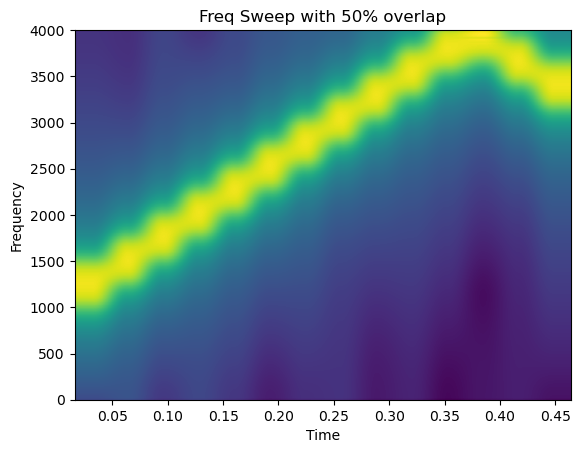

<Figure size 640x480 with 0 Axes>

In [33]:
plt.specgram(s,NFFT=N*2,noverlap=0,Fs=fs)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Freq Sweep with no overlap')
plt.figure()
plt.specgram(s,NFFT=N*2,noverlap=N,Fs=fs)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Freq Sweep with 50% overlap')
plt.figure()

In [37]:
#Question 3
#50% overlap effectively provides twice as much as window samples than 0 overlap
#this will increase the readability of the high lighted line.
#this effect is more obvious for the frequency sweep signal since the frequency content shift overtime